## 3. Applying Gamma Correction

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# Load grayscale image
img_orig = cv.imread('a1images/highlights_and_shadows.jpg')
assert img_orig is not None
img_rgb = cv.cvtColor( img_orig, cv.COLOR_BGR2RGB)
img_ceilab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab) # Convert the image into CEILAB color space  
# Split the image in to L*a*b* color space
L,a,b = cv.split(img_ceilab)

# Define and apply gamma transformation
gamma = 0.65
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t) # Apply gamma correction only for L channel

 # Merge L channel with other channels
merged = cv.merge([L_modified, a, b])
img_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)



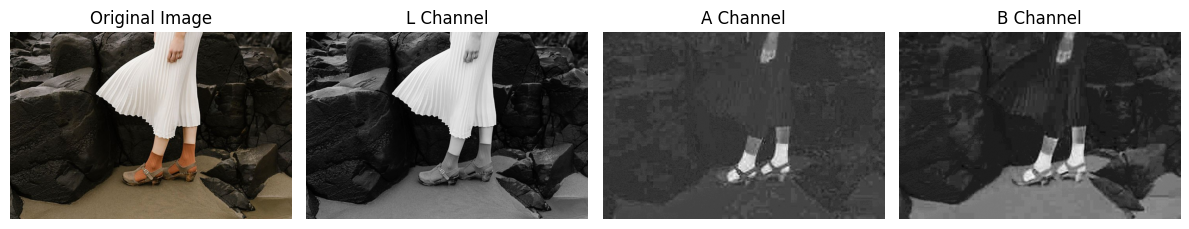

In [8]:
# Display the images
fig, ax = plt.subplots(1, 4, figsize=(12,6))

ax[0].imshow(img_rgb, )
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(L, cmap="gray")
ax[1].set_title('L Channel')
ax[1].axis("off")
ax[2].imshow(a, cmap="gray")
ax[2].set_title('A Channel')
ax[2].axis("off")
ax[3].imshow(b, cmap="gray")
ax[3].set_title('B Channel')
ax[3].axis("off")

plt.tight_layout()
plt.show()

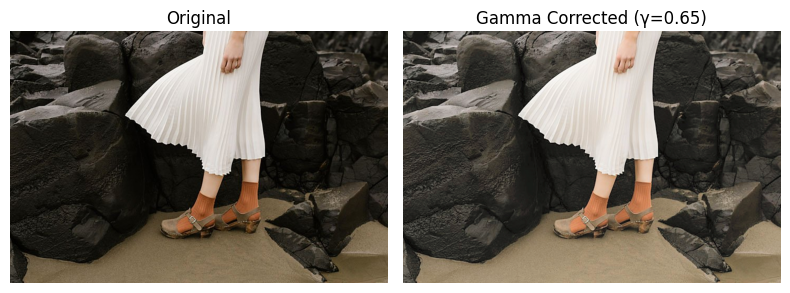

In [9]:
# Display the images
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].imshow(img_rgb)
axs[0].set_title('Original')
axs[0].axis('off') 

axs[1].imshow(img_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  

plt.tight_layout()
plt.show()

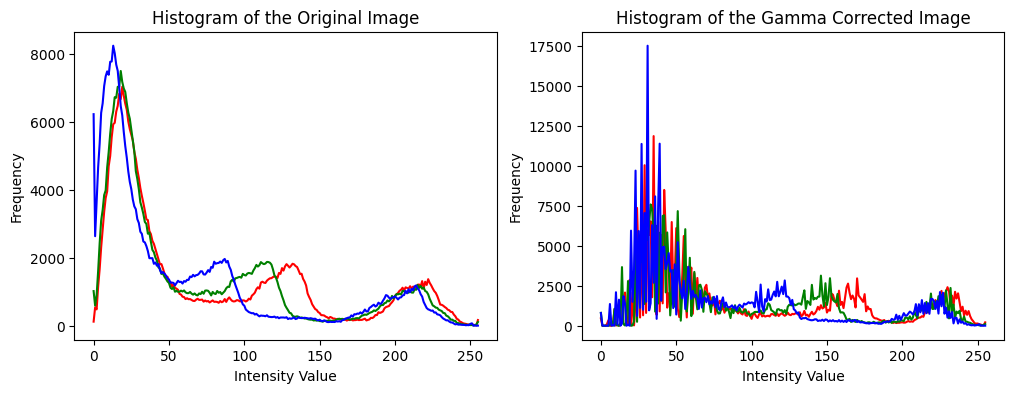

In [10]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, col in enumerate(space):
    hist_orig = cv.calcHist([img_rgb], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    ax[0].set_title('Histogram of the Original Image')
    ax[0].set_xlabel('Intensity Value')
    ax[0].set_ylabel('Frequency')
    hist_gamma = cv.calcHist([img_modified], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])
    ax[1].set_title('Histogram of the Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')
plt.show()

 # Approach


Gamma correction was applied to the L channel of the L*a*b* image using a gamma value of 0.65, brightening darker regions while keeping highlight details intact. The corrected L channel was then recombined with the original a* and b* channels.


 # Interpretation


This adjustment improved shadow detail without overexposing bright areas, but the non-linear change also increased histogram irregularities and introduced slight quantization noise.